<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.9_anovas/stats_anova_1wayANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: ANOVA
# One-way ANOVA (independent samples)

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

In [2]:
## data parameters

# group means
mean1 = 4
mean2 = 3.8
mean3 = 7

# samples per group
N1 = 30
N2 = 35
N3 = 29

# standard deviation (assume common across groups)
stdev = 2


In [3]:
## now to simulate the data
data1 = mean1 + np.random.randn(N1)*stdev
data2 = mean2 + np.random.randn(N2)*stdev
data3 = mean3 + np.random.randn(N3)*stdev

datacolumn = np.hstack((data1,data2,data3))

# group labels
groups = ['1']*N1 + ['2']*N2 + ['3']*N3

# convert to a pandas dataframe
df = pd.DataFrame({'TheData':datacolumn,'Group':groups})
df

,TheData,Group
0,4.414081,1
1,5.697783,1
2,3.252661,1
3,5.024818,1
4,5.450721,1
...,...,...
89,8.173643,3
90,6.134267,3
91,4.950773,3
92,7.598870,3


In [4]:
pg.anova(data=df,dv='TheData',between='Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,91,26.562919,8.196519e-10,0.368607


In the ANOVA table output you've provided, here is what each column represents:

Source: 
This column indicates the factor or variable that is being tested for its effect on the dependent variable. In your case, "Group" is the factor being analyzed.

ddof1: 
This stands for "degrees of freedom 1," which is the between-group degrees of freedom. It corresponds to the number of groups minus one (k - 1), where k is the number of groups.

ddof2: 
This stands for "degrees of freedom 2," which is the within-group (or residual) degrees of freedom. It is calculated as the total number of observations minus the number of groups (N−k), where N is the total number of observations.

F: 
The F-statistic is a ratio of the variance between groups to the variance within groups. It helps determine whether there are significant differences between the means of the groups. A larger F-value typically indicates more substantial evidence against the null hypothesis.

p-unc: 
This is the uncorrected p-value, which indicates the probability of observing the given F-statistic under the null hypothesis that there is no difference between group means. A smaller p-value (e.g., < 0.05) suggests that the observed differences are statistically significant.

np2: 
This represents the partial eta squared (𝜂2), which is a measure of effect size. It quantifies the proportion of the total variance that is attributable to the factor being tested (Group), providing an idea of the strength of the association.

In [5]:
pg.pairwise_tukey(data=df,dv='TheData',between='Group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,4.033043,4.235163,-0.202120,0.437038,-0.462476,8.889502e-01,-0.112880
1,1,3,4.033043,6.995144,-2.962101,0.457429,-6.475543,1.411003e-08,-1.708294
2,2,3,4.235163,6.995144,-2.759981,0.441077,-6.257370,3.769512e-08,-1.527667


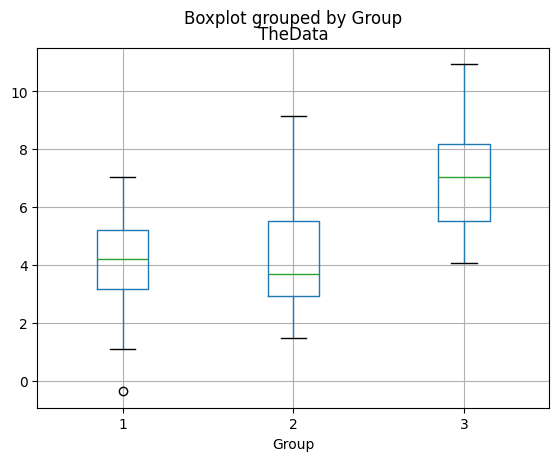

In [6]:
df.boxplot('TheData',by='Group');